In [59]:
!pip install mediapipe

In [60]:
import cv2
import mediapipe as mp


mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
)

In [61]:
import numpy as np
cap = cv2.VideoCapture('/content/2023-11-17 15-02-54.mp4')
if not cap.isOpened():
  print("Could not Open this file.")
else:
  coordinates_per_frane=[]
  while 1:
    ret, frame = cap.read()
    if ret :
      image = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
      results = hands.process(image)

      for hand_landmarks in results.multi_hand_landmarks:
          data=[]
          for i in hand_landmarks.landmark:
              data.append(i.x)
              data.append(i.y)
              data.append(i.z)
      coordinates_per_frane.append(np.array(data))
    else:
      break

In [62]:
print(len(coordinates_per_frane))

36


In [63]:
coordinates_per_frane[0].shape

(63,)

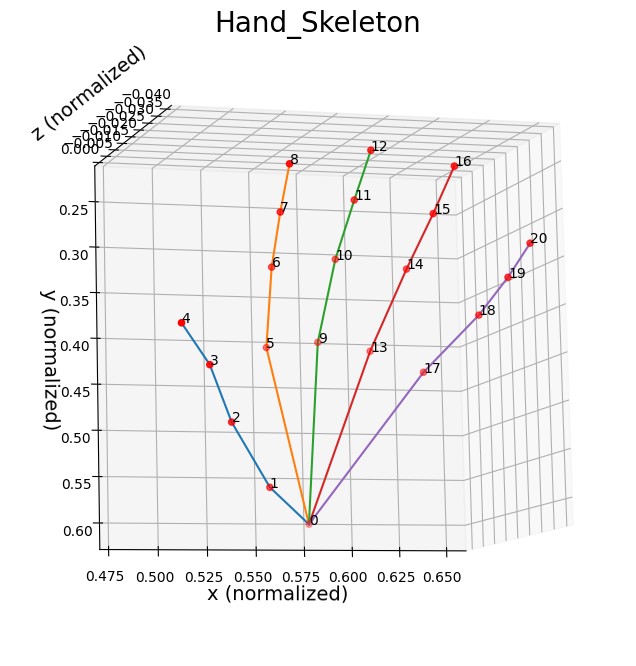

In [64]:
one_hand_coordinate = coordinates_per_frane[0].reshape(-1,3).T
one_hand_coordinate_x = one_hand_coordinate[0]
one_hand_coordinate_y = one_hand_coordinate[1]
one_hand_coordinate_z = one_hand_coordinate[2]


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Figureを追加
fig = plt.figure(figsize = (8, 8))

# 3DAxesを追加
ax = fig.add_subplot(111, projection='3d')

# Axesのタイトルを設定
ax.set_title("Hand_Skeleton", size = 20)
ax.view_init(elev=-110, azim=-25, roll=-65)
# 軸ラベルを設定
ax.set_xlabel("x (normalized)", size = 14)
ax.set_ylabel("y (normalized)", size = 14)
ax.set_zlabel("z (normalized)", size = 14)

# 軸目盛を設定
# ax.set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
# ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])

ax.scatter3D(one_hand_coordinate_x, one_hand_coordinate_y, one_hand_coordinate_z, color = "red")
for i in range(21):
  ax.text(one_hand_coordinate_x[i], one_hand_coordinate_y[i], one_hand_coordinate_z[i], str(i))

ax.plot(one_hand_coordinate_x[[0]+ [x for x in range(1,5)]],one_hand_coordinate_y[[0]+ [x for x in range(1,5)]],one_hand_coordinate_z[[0]+ [x for x in range(1,5)]])
ax.plot(one_hand_coordinate_x[[0]+ [x for x in range(5,9)]],one_hand_coordinate_y[[0]+ [x for x in range(5,9)]],one_hand_coordinate_z[[0]+ [x for x in range(5,9)]])
ax.plot(one_hand_coordinate_x[[0]+ [x for x in range(9,13)]],one_hand_coordinate_y[[0]+ [x for x in range(9,13)]],one_hand_coordinate_z[[0]+ [x for x in range(9,13)]])
ax.plot(one_hand_coordinate_x[[0]+ [x for x in range(13,17)]],one_hand_coordinate_y[[0]+ [x for x in range(13,17)]],one_hand_coordinate_z[[0]+ [x for x in range(13,17)]])
ax.plot(one_hand_coordinate_x[[0]+ [x for x in range(17,21)]],one_hand_coordinate_y[[0]+ [x for x in range(17,21)]],one_hand_coordinate_z[[0]+ [x for x in range(17,21)]])